In [1]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading dataset in pandas
df = pd.read_csv("SBI.csv")
#Droping unwanted columns
df.drop(["Date", "Adj Close"], axis=1, inplace=True)
print("Shape ->",df.shape)
df.head()

Shape -> (6353, 5)


,Open,High,Low,Close,Volume
0,18.691147,18.978922,18.540184,18.823240,43733533.0
1,18.894005,18.964767,17.738192,18.224106,56167280.0
2,18.327892,18.568489,17.643839,17.738192,68296318.0
3,17.502312,17.832542,17.223972,17.676863,86073880.0
4,17.738192,17.785366,17.459852,17.577793,76613039.0


In [3]:
#Shifting whole dataset down by one row so we can use yesterdays data to predict todays closing price
df['Close'] =  df['Close'].shift(-1)
df.head()

,Open,High,Low,Close,Volume
0,18.691147,18.978922,18.540184,18.224106,43733533.0
1,18.894005,18.964767,17.738192,17.738192,56167280.0
2,18.327892,18.568489,17.643839,17.676863,68296318.0
3,17.502312,17.832542,17.223972,17.577793,86073880.0
4,17.738192,17.785366,17.459852,17.063574,76613039.0


In [4]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]
df.head()

,Open,High,Low,Volume,Close
0,18.691147,18.978922,18.540184,43733533.0,18.224106
1,18.894005,18.964767,17.738192,56167280.0,17.738192
2,18.327892,18.568489,17.643839,68296318.0,17.676863
3,17.502312,17.832542,17.223972,86073880.0,17.577793
4,17.738192,17.785366,17.459852,76613039.0,17.063574


In [5]:
#Filling null values using pad values, will fill next rows values to empty cells
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

<AxesSubplot:>

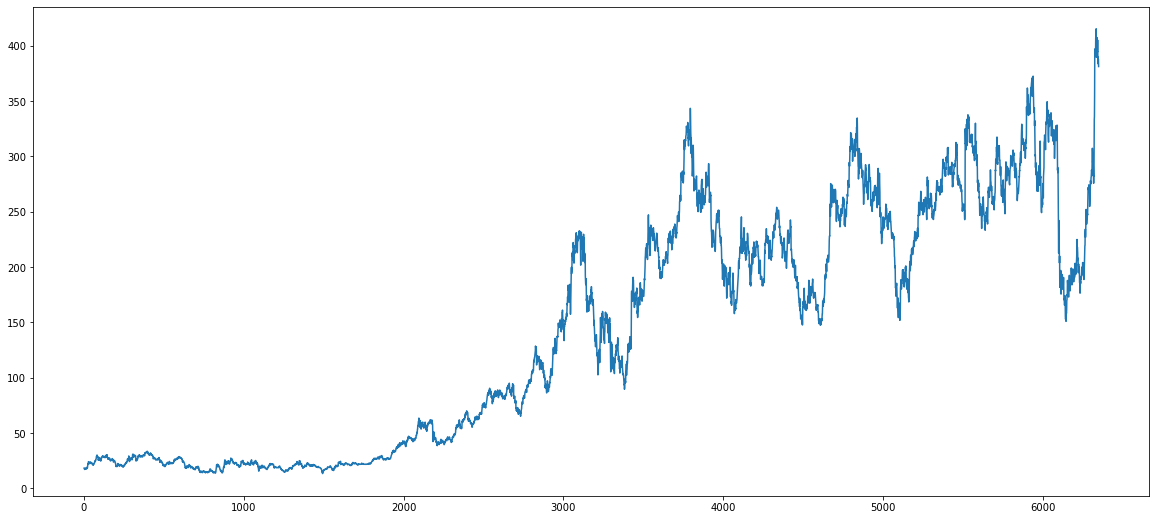

In [6]:
#Dataset Plotted
df['Close'].plot(figsize=(20,9))

In [7]:
#columns for x and y
x  = df[['Open','High','Low','Volume']]
y = df['Close']

In [8]:
#Normalising data
scaler = MinMaxScaler()
df[['Open','High','Low','Volume']] = scaler.fit_transform(df[['Open','High','Low','Volume']])
df.head()

,Open,High,Low,Volume,Close
0,0.012666,0.012188,0.013299,0.097849,18.224106
1,0.013159,0.012154,0.011297,0.125668,17.738192
2,0.011783,0.011196,0.011061,0.152806,17.676863
3,0.009777,0.009418,0.010013,0.192581,17.577793
4,0.010351,0.009304,0.010602,0.171414,17.063574


In [9]:
#Splitting data
x_train , x_test , y_train , y_test = train_test_split(x ,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4743, 4)
(1581, 4)
(4743,)
(1581,)


---
# Random Forest

In [10]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
model_rf.fit(x_train, y_train)   

RandomForestRegressor(random_state=0)

In [11]:
#predicting stock price using our model
preds_rf = model_rf.predict(x_test)

dfpred_rf = pd.DataFrame({'Actual':y_test,'Predicted':preds_rf, 'Difference':abs(y_test-preds_rf)})
dfpred_rf.head(10)

,Actual,Predicted,Difference
5586,297.350006,311.405603,14.055597
876,18.634537,19.760581,1.126044
3664,228.009995,226.851600,1.158395
6038,312.799988,317.540002,4.740014
3471,172.294998,167.390242,4.904756
3223,123.779999,115.126143,8.653856
4442,204.585007,200.229400,4.355607
3783,311.660004,317.260900,5.600896
1136,18.648689,18.406818,0.241871
3011,150.996353,152.686679,1.690326


In [12]:
#Different Metrics calculated using our model
print("Score:", model_rf.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_rf))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_rf))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_rf))**0.5)
print('Loss:', abs(y_test-preds_rf).mean())

Score: 0.9978370385086334
Mean Absolute Error: 2.9448090213802285
Mean Squared  Error: 23.84317027594718
Root Mean Squared Error: 4.882946884407732
Loss: 2.9448090213802285


---
# k-NN

In [13]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=7)
model_knn.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]})

In [14]:
#predicting stock price using our model
preds_knn = model_knn.predict(x_test)

dfpred_knn = pd.DataFrame({'Actual':y_test,'Predicted':preds_knn, 'Difference':abs(y_test-preds_knn)})
dfpred_knn.head(10)

,Actual,Predicted,Difference
5586,297.350006,148.079518,149.270488
876,18.634537,123.441742,104.807205
3664,228.009995,181.847645,46.162350
6038,312.799988,88.167527,224.632461
3471,172.294998,197.333904,25.038906
3223,123.779999,206.079719,82.299720
4442,204.585007,195.911777,8.673230
3783,311.660004,214.765591,96.894413
1136,18.648689,213.194704,194.546015
3011,150.996353,174.368673,23.372320


In [15]:
model_knn.get_params()

{'cv': 7,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [16]:
#Different Metrics calculated using our model
print("Score:", model_knn.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_knn))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_knn))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_knn))**0.5)
print('Loss:', abs(y_test-preds_knn).mean())

Score: 0.16860715006904614
Mean Absolute Error: 77.66942608466611
Mean Squared  Error: 9164.768474257047
Root Mean Squared Error: 95.73279727583984
Loss: 77.66942608466611


---
# Decision Tree

In [17]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [18]:
#predicting stock price using our model
preds_dt = model_dt.predict(x_test)

dfpred_dt = pd.DataFrame({'Actual':y_test,'Predicted':preds_dt, 'Difference':abs(y_test-preds_dt)})
dfpred_dt.head(10)

,Actual,Predicted,Difference
5586,297.350006,315.950012,18.600006
876,18.634537,18.809088,0.174551
3664,228.009995,229.639999,1.630004
6038,312.799988,330.200012,17.400024
3471,172.294998,166.017212,6.277786
3223,123.779999,110.970001,12.809998
4442,204.585007,196.404999,8.180008
3783,311.660004,318.899994,7.239990
1136,18.648689,18.629820,0.018869
3011,150.996353,152.194626,1.198273


In [19]:
#Different Metrics calculated using our model
print("Score:", model_dt.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_dt))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_dt))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_dt))**0.5)
print('Loss:', abs(y_test-preds_dt).mean())

Score: 0.9965388077503812
Mean Absolute Error: 3.8518713497786203
Mean Squared  Error: 38.154075555597814
Root Mean Squared Error: 6.176898538554589
Loss: 3.8518713497786203


---
# Linear Regression

In [20]:
#linear Regression
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [21]:
#Coefficients and Intercept of LR
print(model_lr.coef_)
print(model_lr.intercept_)

[-7.72646228e-01  9.17313945e-01  8.53893275e-01 -2.88966605e-09]
0.21094014009165107


In [22]:
#predicting stock price using our model
preds_lr = model_lr.predict(x_test)

dfpred_lr = pd.DataFrame({'Actual':y_test,'Predicted':preds_lr, 'Difference':abs(y_test-preds_lr)})
dfpred_lr.head(10)

,Actual,Predicted,Difference
5586,297.350006,306.895850,9.545844
876,18.634537,20.199631,1.565094
3664,228.009995,229.113558,1.103563
6038,312.799988,317.576348,4.776360
3471,172.294998,167.447612,4.847386
3223,123.779999,115.952128,7.827871
4442,204.585007,202.658884,1.926123
3783,311.660004,315.987824,4.327820
1136,18.648689,18.542348,0.106341
3011,150.996353,149.164137,1.832216


In [23]:
#Different Metrics calculated using our model
print("Score:", model_lr.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_lr))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_lr))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_lr))**0.5)
print('Loss:', abs(y_test-preds_lr).mean())

Score: 0.9981794427377066
Mean Absolute Error: 2.619000511699376
Mean Squared  Error: 20.068714572697942
Root Mean Squared Error: 4.479811890325077
Loss: 2.619000511699376
